Regresja liniowa,
(x1,y1),...,(xn,yn)

metoda najmniejszych kwadratów - dopasowanie prostej (y = b1*x + b0)

x1,...,xn
          => b0,b1  
y1,...,yn

b1,b0 = np.polyfit(x,y,1)


### Zadanie 1

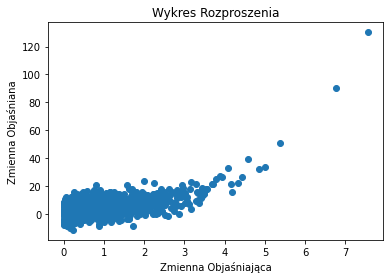

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

DaneX=pd.read_csv("ZAD1.txt", header=None, sep='\s+', usecols=[0])
DaneY=pd.read_csv("ZAD1.txt", header=None, sep='\s+', usecols=[1])

X = DaneX[0].to_list()
Y = DaneY[1].to_list()

plt.scatter(X,Y)
plt.title("Wykres Rozproszenia")
plt.xlabel('Zmienna Objaśniająca')
plt.ylabel('Zmienna Objaśniana')
plt.show()

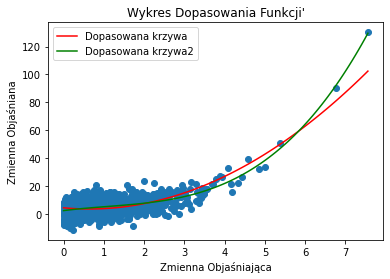

Parametry a,b,c: [ 2.05990324 -2.6214519   4.56500937]
Parametry a,b,c,d: [ 0.40444853 -1.31790164  3.65908533  2.5561721 ]


In [2]:
def func(X, a, b, c):
    return(a*X**2 + b*X + c)

def func1(X, a, b, c, d):
    return(a*X**3 + b*X**2 + c*X + d)

parametry = curve_fit(func, X, Y)[0]

x = np.linspace(min(X), max(X), 100)
y = func(x, *parametry)

parametry1 = curve_fit(func1, X, Y)[0]

y1 = func1(x, *parametry1)

plt.scatter(X,Y)
plt.title("Wykres Dopasowania Funkcji'")
plt.xlabel('Zmienna Objaśniająca')
plt.ylabel('Zmienna Objaśniana')
plt.plot(x, y, color='red', label='Dopasowana krzywa')
plt.plot(x, y1, color='green', label='Dopasowana krzywa2')
plt.legend()

plt.show()

print("Parametry a,b,c:", parametry)
print("Parametry a,b,c,d:", parametry1)


### Zadanie 2

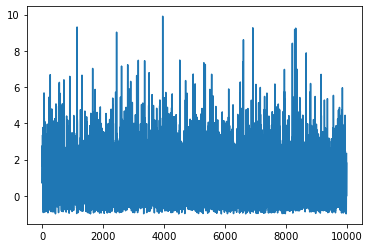

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Dane=pd.read_csv("ZAD2.txt", header=None,sep='\s+')
Dane_list = Dane[0].to_list()

x = np.linspace(0,len(Dane_list),len(Dane_list))
plt.plot(x,Dane_list)
plt.show()

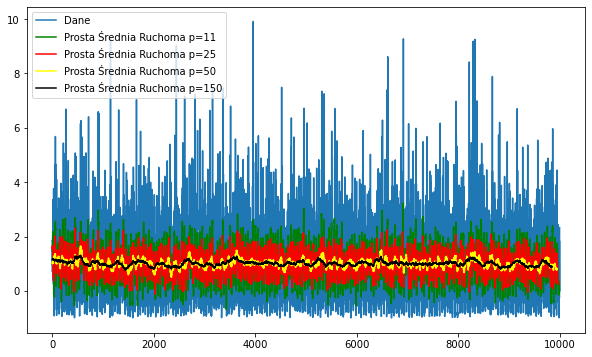

In [4]:
import numpy as np
def psr(data, p):
    
    suma = np.cumsum(data, dtype=float)
    suma[p:] = suma[p:]-suma[:-p]
    
    return suma[p-1:]/p

# Wartość p
p1 = 11
p2 = 25
p3 = 50
p4 = 150

plt.figure(figsize=(10, 6))

plt.plot(x, Dane_list, label="Dane")
plt.plot(psr(Dane_list,p1), label=f"Prosta Średnia Ruchoma p={p1}", color="green")
plt.plot(psr(Dane_list,p2), label=f"Prosta Średnia Ruchoma p={p2}", color="red")
plt.plot(psr(Dane_list,p3), label=f"Prosta Średnia Ruchoma p={p3}", color="yellow")
plt.plot(psr(Dane_list,p4), label=f"Prosta Średnia Ruchoma p={p4}", color="black")
plt.legend()
plt.show()

### Zadanie 3

[19.96646466  5.22690617]


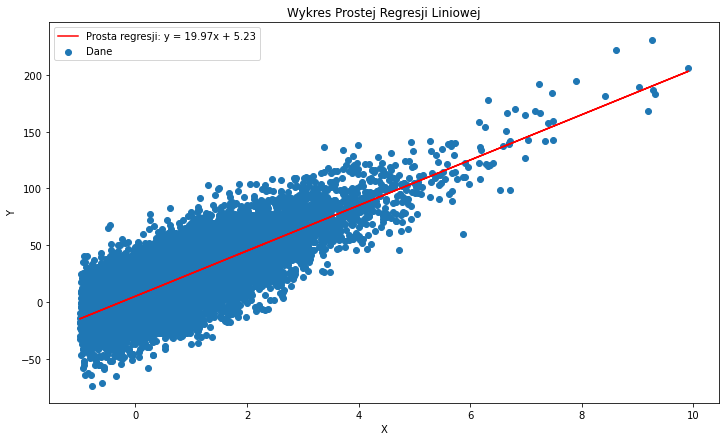

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


DaneX = pd.read_csv("ZAD2.txt", header=None,sep='\s+')[0].to_list() # Zmienna Objaśniająca
DaneY = pd.read_csv("ZAD3.txt", header=None,sep='\s+')[0].to_list() # Zmeinna Objaśniana


x_sr = np.sum(DaneX)/len(DaneX)
y_sr = np.sum(DaneY)/len(DaneY)


b1 = (np.sum((DaneX-x_sr)*DaneY) / np.sum((DaneX-x_sr)**2))
b0 = y_sr - b1*x_sr

X = np.array(DaneX)
Y = np.array(DaneY)

print(np.polyfit(X,Y,1))

plt.figure(figsize=(12, 7)) 
plt.scatter(X, Y, label = 'Dane')
plt.plot(X, b1*X+b0, color='red', label=f'Prosta regresji: y = {b1:.2f}x + {b0:.2f}')
plt.title("Wykres Prostej Regresji Liniowej")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

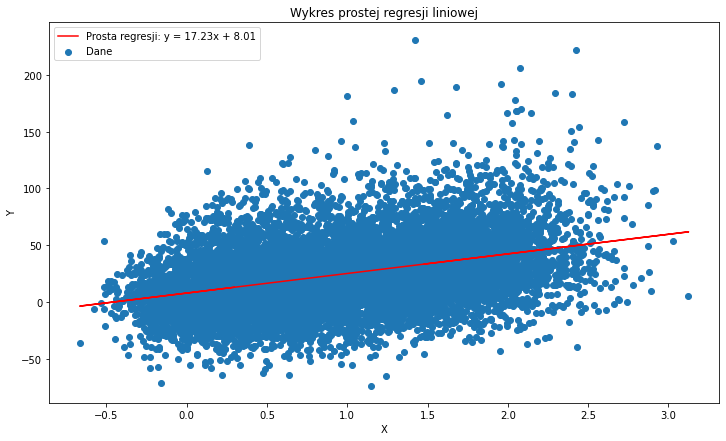

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


DaneX = pd.read_csv("ZAD2.txt", header=None,sep='\s+')[0].to_list() # Zmienna Objaśniająca
DaneY = pd.read_csv("ZAD3.txt", header=None,sep='\s+')[0].to_list() # Zmeinna Objaśniana


def psw(data, p):
    suma = np.cumsum(data, dtype=float)
    suma[p:] = suma[p:]-suma[:-p]
    return suma[p-1:]/p

p=12
i=1
while i <p:
    DaneY.remove(DaneY[len(DaneY)-i])
    i=i+1

DaneX1 = np.array(psw(DaneX,p))
Y = np.array(DaneY)

x_sr = np.sum(DaneX1)/len(DaneX1)
y_sr = np.sum(DaneY)/len(DaneY)


b1 = (np.sum((DaneX1-x_sr)*DaneY) / np.sum((DaneX1-x_sr)**2))
b0 = y_sr - b1*x_sr


plt.figure(figsize=(12, 7)) 
plt.scatter(DaneX1, Y, label = 'Dane')
plt.plot(DaneX1, b1*DaneX1+b0, color='red', label=f'Prosta regresji: y = {b1:.2f}x + {b0:.2f}')
plt.title("Wykres prostej regresji liniowej")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### Zadanie 4

0.6197996079675642


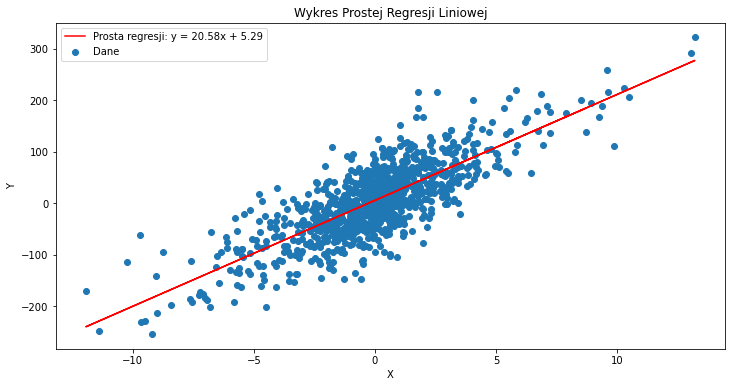

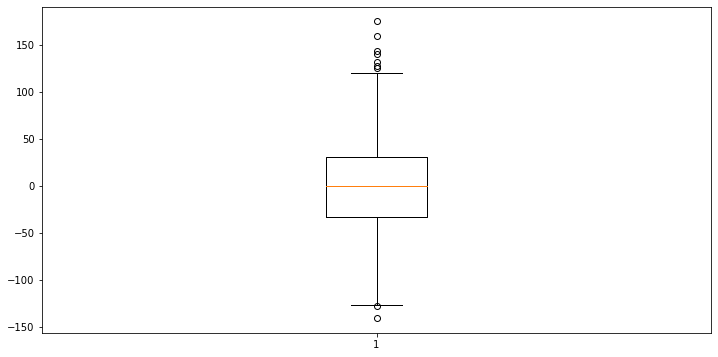

0.638228931703971


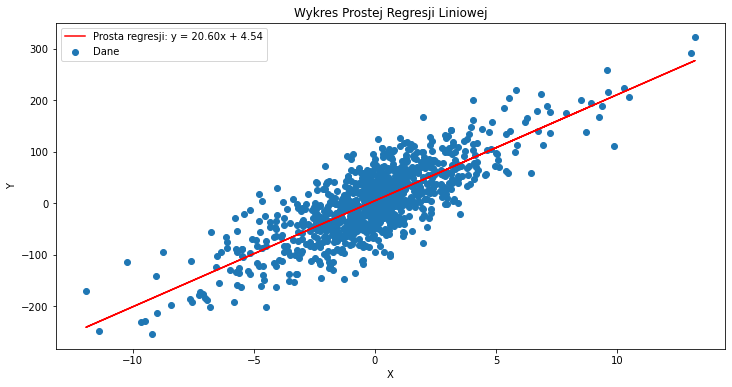

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


DaneX = pd.read_csv("ZAD4.txt", header=None,sep='\s+',usecols=[0]) # Zmienna Objaśniająca
DaneY = pd.read_csv("ZAD4.txt", header=None,sep='\s+',usecols=[1]) # Zmeinna Objaśniana

X = DaneX[0].to_list()
Y = DaneY[1].to_list()

x_sr = np.sum(X)/len(X)
y_sr = np.sum(Y)/len(Y)


b1 = (np.sum((X-x_sr)*Y) / np.sum((X-x_sr)**2))
b0 = y_sr - b1*x_sr

X1 = np.array(X)
Y1 = np.array(Y)

Wsp_determinacji = np.sum((b1*X1+b0 - y_sr)**2) / np.sum((Y1-y_sr)**2)
print(Wsp_determinacji)

plt.figure(figsize=(12, 6)) 
plt.scatter(X1, Y1, label = 'Dane')
plt.plot(X1, b1*X1+b0, color='red', label=f'Prosta regresji: y = {b1:.2f}x + {b0:.2f}')
plt.title("Wykres Prostej Regresji Liniowej")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

residua = Y1 - b1*X1 - b0

plt.figure(figsize=(12, 6)) 
plt.boxplot(residua)
plt.show()


Q1, Q3 = np.quantile(residua, [0.25, 0.75])

IQR = Q3 - Q1

selected_data = (residua>= Q1 - 1.5 * IQR) & (residua <= Q3 + 1.5 * IQR)

X2 = X1[selected_data]
Y2 = Y1[selected_data]

removed_elements = []

for i in range(len(X1)):
    if not selected_data[i]:
        removed_elements.append((X1[i], X2[i]))
        
x_sr1 = np.sum(X2)/len(X2)
y_sr1 = np.sum(Y2)/len(Y2)


b11 = (np.sum((X2-x_sr1)*Y2) / np.sum((X2-x_sr1)**2))
b01 = y_sr1 - b1*x_sr1

Wsp_determinacji2 = np.sum((b11*X2+b01 - y_sr1)**2) / np.sum((Y2-y_sr1)**2)
print(Wsp_determinacji2)

plt.figure(figsize=(12, 6)) 
plt.scatter(X2, Y2, label = 'Dane')
plt.plot(X2, b11*X2+b01, color='red', label=f'Prosta regresji: y = {b11:.2f}x + {b01:.2f}')
plt.title("Wykres Prostej Regresji Liniowej")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
        


### Zadanie 5

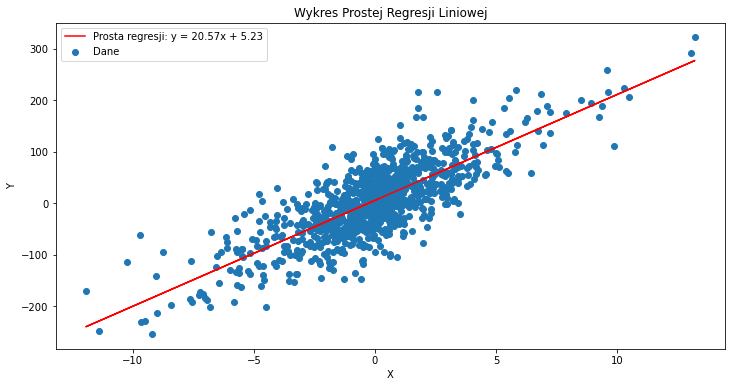

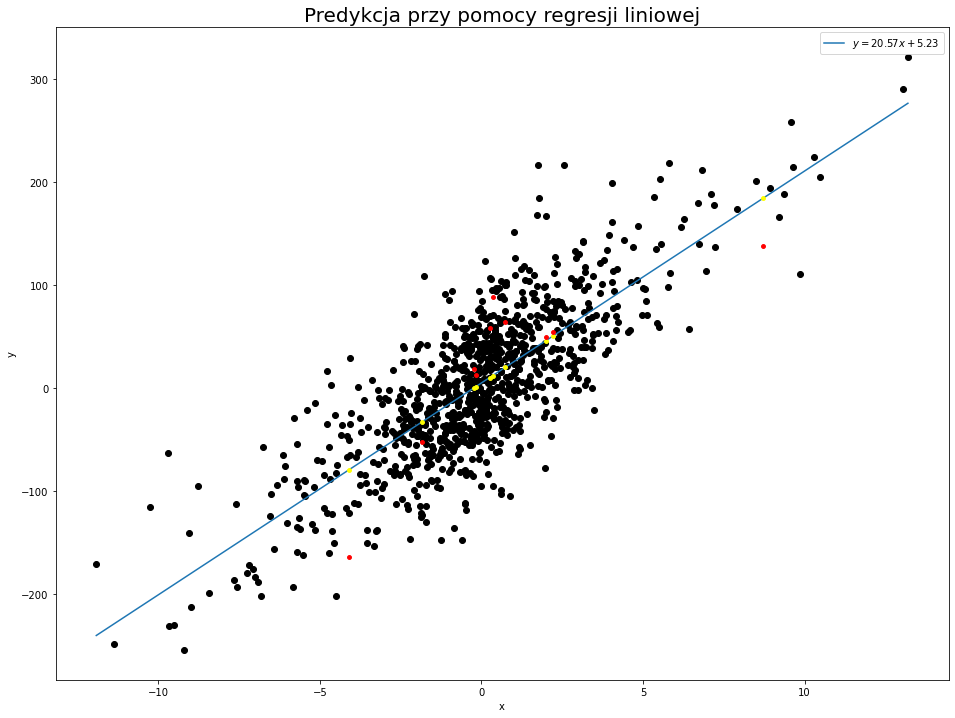

[ 47.69182124  18.08146598  11.21722773   4.44187776   4.03625841
 -19.83391555 -84.46272399  76.68806156  44.35408611 -46.08330945]


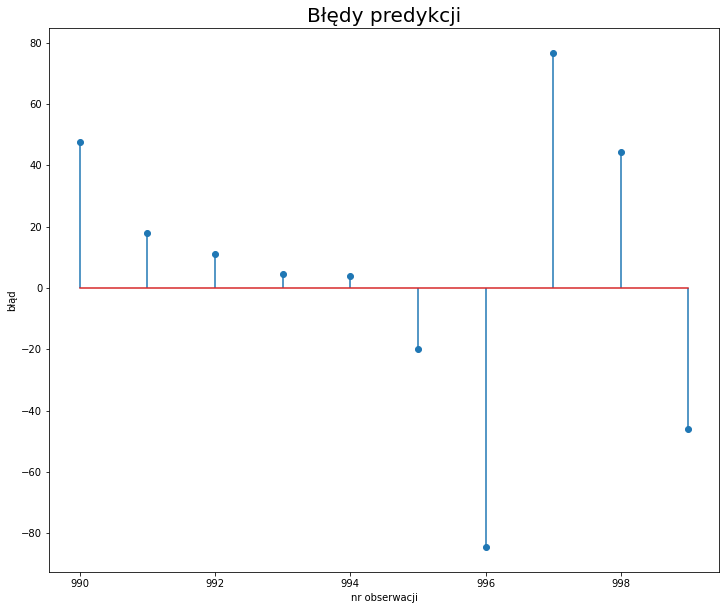

In [61]:
DaneX = pd.read_csv("ZAD4.txt", header=None,sep='\s+',usecols=[0]) # Zmienna Objaśniająca
DaneY = pd.read_csv("ZAD4.txt", header=None,sep='\s+',usecols=[1]) # Zmeinna Objaśniana

X = DaneX[0].to_list()
Y = DaneY[1].to_list()

X1 = np.array(X)
Y1 = np.array(Y)

x = X1[:990]
y = Y1[:990]

x_mean = np.mean(x)
y_mean = np.mean(y)

b1 = (np.sum((x-x_mean)*y) / np.sum((x-x_mean)**2))
b0 = y_mean - b1*x_mean

plt.figure(figsize=(12, 6)) 
plt.scatter(x, y, label = 'Dane')
plt.plot(x, b1*x+b0, color='red', label=f'Prosta regresji: y = {b1:.2f}x + {b0:.2f}')
plt.title("Wykres Prostej Regresji Liniowej")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

x1 = X1[990:]
y1 = Y1[990:]

prediction = b0 + b1 * x1
xs = np.linspace(min(x), max(x), 1000)
ys = b0 + b1 * xs

plt.subplots(figsize=(16, 12))
plt.scatter(x, y, color="black")
plt.plot(xs, ys, label=r"$y = {:.2f}x + {:.2f}$".format(b1, b0))
plt.scatter(x1, prediction, color="yellow", s=15, zorder=10)
plt.scatter(x1, y1, color="red", s=15, zorder=10)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Predykcja przy pomocy regresji liniowej", fontsize=20)
plt.show()


errors = y1 -(b0 + b1 * x1)
print(errors)

plt.subplots(figsize=(12, 10))
plt.stem(range(990,1000), errors)
plt.xlabel("nr obserwacji")
plt.ylabel("błąd")
plt.title("Błędy predykcji", fontsize=20)
plt.show()

### Zadanie 6

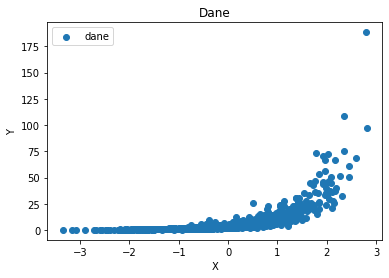

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

DaneX = pd.read_csv("ZAD6.txt", header=None,sep='\s+',usecols=[0])
DaneY = pd.read_csv("ZAD6.txt", header=None,sep='\s+',usecols=[1])

plt.scatter(DaneX,DaneY, label ='dane')
plt.title("Dane")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

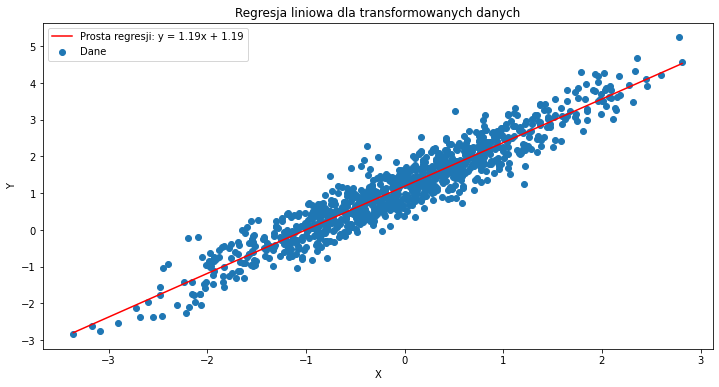

In [14]:
X = DaneX[0].to_list()
Y = DaneY[1].to_list()
Y_log = np.log(Y)

x_sr = np.sum(X)/len(X)
y_sr = np.sum(Y_log)/len(Y_log)

b1 = (np.sum((X-x_sr)*Y_log) / np.sum((X-x_sr)**2))
b0 = y_sr - b1*x_sr

X1 = np.array(X)
Y1 = np.array(Y_log)

xs = np.linspace(min(X1), max(X1), 1000)
ys = b0 + b1 * xs

plt.figure(figsize=(12, 6)) 
plt.scatter(X1, Y1, label = 'Dane')
plt.plot(xs, ys, color='red', label=f'Prosta regresji: y = {b1:.2f}x + {b0:.2f}')
plt.title("Regresja liniowa dla transformowanych danych")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

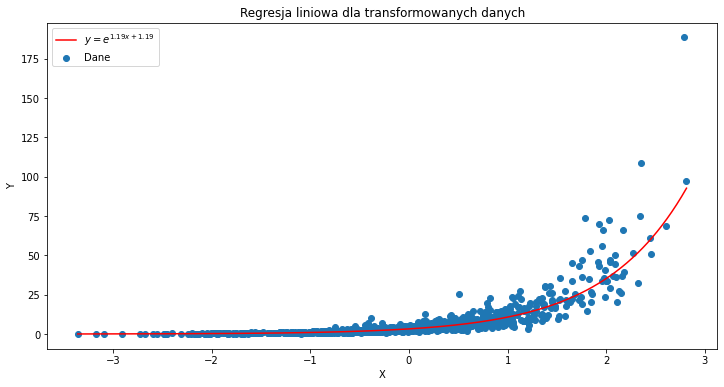

In [16]:
Y_exp = np.exp(Y)
Y1 = np.array(Y)

plt.figure(figsize=(12, 6)) 
plt.scatter(X1, Y1, label = 'Dane')
plt.plot(xs,np.exp(ys) , color='red',label=r"$y = e^{1.19x + 1.19}$")
plt.title("Regresja liniowa dla transformowanych danych")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()